---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Práctica 4: modelos climáticos globales </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

In [1]:
pip install cftime

  Using cached cftime-1.6.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.6 kB)
Using cached cftime-1.6.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xarray

  Using cached xarray-2024.5.0-py3-none-any.whl.metadata (11 kB)
Using cached xarray-2024.5.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.3.0-py3-none-any.whl (43 kB)
Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

  Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 1 - El ciclo anual (9 puntos) </font>**

Defina 3 regiones características de México, puede ser Norte, Sur y Centro, por poner un ejemplo. Utilice los datos de la simulación histórica del modelo HadGEM3-GC31-LL.

#### **<font color="RoyalBlue"> 1. Haga una función que calcule el ciclo anual de una variable y en el retorno devuelva el arreglo de numpy o xarray correspondiente a los 12 puntos del ciclo anual, uno para cada mes. </font>**
    
#### **<font color="RoyalBlue"> 2. Compare el ciclo anual de la temperatura, precipitación y radiación saliente de onda larga en sus 3 regiones. Haga 3 gráficas, una variable por gráfica, y en cada una compare sus 3 regiones indicando en la leyenda claramente cada región. </font>**

#### **<font color="RoyalBlue"> 3. Interprete sus resultados explicando el clima en México visto desde esta simulación.   </font>**

---

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 2 - La tendencia en la precipitación (12 puntos) </font>**

Utilice los datos de precipitación de las simulaciones histórica y amip del modelo HadGEM3-GC31-LL.

#### **<font color="RoyalBlue"> 1. Calcule correctamente la precipitación promedio global en sus dos simulaciones.  </font>**
    
#### **<font color="RoyalBlue"> 2. Grafique la serie de tiempo entre 1979-2014. </font>**

#### **<font color="RoyalBlue"> 3. Interprete sus resultados. Haga notar, particularmente, tendencias y diferencias entre las simulaciones.   </font>**

#### **<font color="RoyalBlue"> 4. Repita los pasos 1 a 3 pero utilizando las regiones definidas en el problema 1.   </font>**

Referencias

- Trenberth, Kevin E. "Changes in precipitation with climate change." Climate research 47.1-2 (2011): 123-138.

---

In [60]:
#Ejercicio 2.1
filename1='pr_Amon_HadGEM3-GC31-LL_historical_r2i1p1f3_gn_195001-201412.nc'
filename2='pr_Amon_HadGEM3-GC31-LL_amip_r1i1p1f3_gn_197901-201412.nc'

ds1=xr.open_dataset(filename1)
ds2=xr.open_dataset(filename2)
prda_hist=ds1['pr']*86400
prda_amip=ds2['pr']*86400

In [61]:
time_hist=prda_hist[(prda_hist.time.dt.year>=1979)&(prda_hist.time.dt.year<=2014)]
time_amip=prda_amip[(prda_amip.time.dt.year>=1979)&(prda_amip.time.dt.year<=2014)]

In [62]:
latsh=time_hist.lat
lonsh=time_hist.lon

latsami=time_amip.lat
lonsami=time_amip.lon

In [63]:
weights_hist = np.cos(np.deg2rad(latsh))
weights_hist.name = "weights_hist"

weights_amip = np.cos(np.deg2rad(latsami))
weights_amip.name = "weights_amip"

In [64]:
#Sacamos los promedios ponderados
prda_hist_weighted = time_hist.weighted(weights_hist)
prda_amip_weighted = time_amip.weighted(weights_amip)

In [65]:
#Ejercicio 2.2
prom1=prda_hist_weighted.mean(['lon','lat'])
prom2=prda_amip_weighted.mean(['lon','lat'])

In [66]:
datetimeindex1 = time_hist.indexes['time'].to_datetimeindex()
datetimeindex2 = time_amip.indexes['time'].to_datetimeindex()

/tmp/ipykernel_693/1533968057.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex1 = time_hist.indexes['time'].to_datetimeindex()
/tmp/ipykernel_693/1533968057.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex2 = time_amip.indexes['time'].to_datetimeindex()


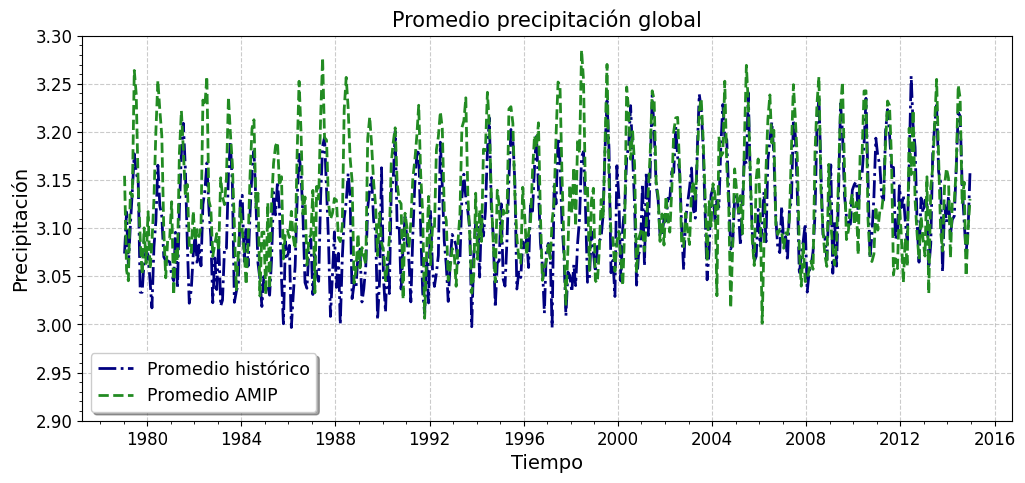

In [68]:
plt.figure(figsize=(12,5))
plt.plot(datetimeindex1,prom1,c='navy',label='Promedio histórico',linewidth=2,linestyle='-.')
plt.plot(datetimeindex2,prom2,c='forestgreen',label='Promedio AMIP',linewidth=2,linestyle='--')
lineplot_setup(None,None,'Tiempo','Precipitación',title='Promedio precipitación global',ymin=2.9,ymax=3.3,legend=True)

In [15]:
#Ejercicio 2.3

El histórico tiene una tendencia a crecer, ya que estos experimentos incluyen la simulación de la dinámica del océano, lo que significa que incorporan todas las retroalimentaciones entre el océano y la atmósfera. Se llega a precipitaciones de 3.27 mm day-1, que conforme el paso del tiempo hay una disminución a 3.25 mm day-1 y 3.05 mm day-1. 

En contraste, los experimentos AMIP, al no considerarse la variable del océano acoplado, no hay una gran variabilidad y se muestran datos menores que con el histórico. Sim embargo, la tendencia es la misma, solo son las magnitudes las que cambian

In [17]:
#Ejercicio 2.4 
filename3='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'
ds3=xr.open_dataset(filename3)
tas = ds3['tas']

In [18]:
#Estas son las 3 regiones del anterior ejercicio, a ellas las vamos a ponderar
mxn_t=tas.sel(lat=slice(28,32), lon=slice(104,110))
mxc_t=tas.sel(lat=slice(18,21), lon=slice(98,102))
mxs_t=tas.sel(lat=slice(14,18), lon=slice(90,94))

In [19]:
lats_mxn=mxn_t.lat
lats_mxc=mxc_t.lat
lats_mxs=mxs_t.lat

In [20]:
weights_mxn = np.cos(np.deg2rad(lats_mxn))
weights_mxn.name = "weights_mxn"
weights_mxc = np.cos(np.deg2rad(lats_mxc))
weights_mxc.name = "weights_mxc"
weights_mxs = np.cos(np.deg2rad(lats_mxs))
weights_mxs.name = "weights_mxs"

In [21]:
#Sacamos los promedios ponderados
tas_weighted_mxn = mxn_t.weighted(weights_mxn)
tas_weighted_mxc = mxc_t.weighted(weights_mxc)
tas_weighted_mxs = mxs_t.weighted(weights_mxs)

prom_mxn=tas_weighted_mxn.mean(['lon','lat'])
prom_mxc=tas_weighted_mxc.mean(['lon','lat'])
prom_mxs=tas_weighted_mxs.mean(['lon','lat'])

dt_mxn = mxn_t.indexes['time'].to_datetimeindex()
dt_mxc = mxc_t.indexes['time'].to_datetimeindex()
dt_mxs = mxs_t.indexes['time'].to_datetimeindex()

/tmp/ipykernel_693/50252372.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dt_mxn = mxn_t.indexes['time'].to_datetimeindex()
/tmp/ipykernel_693/50252372.py:11: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dt_mxc = mxc_t.indexes['time'].to_datetimeindex()
/tmp/ipykernel_693/50252372.py:12: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dt_mxs = 

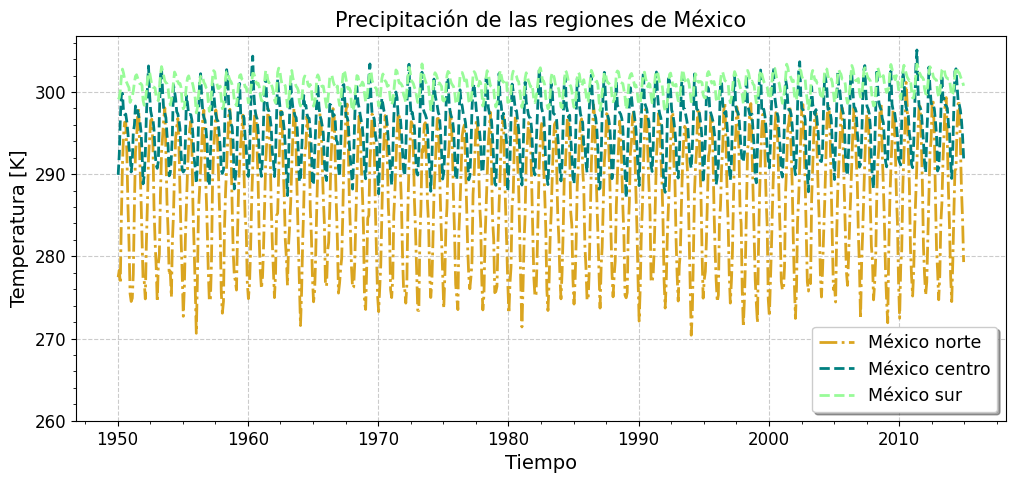

In [69]:
plt.figure(figsize=(12,5))
plt.plot(dt_mxn,prom_mxn,c='goldenrod',label='México norte',linewidth=2,linestyle='-.')
plt.plot(dt_mxc,prom_mxc,c='teal',label='México centro',linewidth=2,linestyle='--')
plt.plot(dt_mxs,prom_mxs,c='palegreen',label='México sur',linewidth=2,linestyle='--')
lineplot_setup(None,None,'Tiempo','Temperatura [K]',title='Precipitación de las regiones de México',ymin=260,ymax=None,legend=True)

In [23]:
#Ejercicio 2.4

Los datos son congruentes con la geografía del país. Conforme nos movemos al sur de México, las latitudes bajan y la temperatura aumenta por el aumento de radiación que llega al ecuador. No obstante, al norte del país si bien la radiación disminuye, no es un proceso exponencial puesto que el ambiente del país en esas regiones son áridas y se propicia las altas temperaturas.

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 3 - El índice de ENSO (14 puntos) </font>**

Utilice los datos de la simulación histórica del modelo HadGEM3-GC31-LL (temperatura superficial - tas).


#### **<font color="RoyalBlue"> 1. Calcule el promedio de área en la región conocida como Nino 3.4 para el período 1950-2014. Obtendrá una serie de tiempo. </font>**
    
#### **<font color="RoyalBlue"> 2. Calcule el ciclo anual de esta serie de tiempo.  </font>**

#### **<font color="RoyalBlue"> 3. Para cada elemento de su serie de tiempo, remueva el valor correspondiente al promedio del ciclo anual del mes correspondiente. Por ejemplo, a todos sus datos de enero le tiene que restar el valor promedio de enero, obtenido por el punto 2.  </font>**

#### **<font color="RoyalBlue"> 4. Grafique la serie de tiempo resultante. </font>**

#### **<font color="RoyalBlue"> 5. Discuta cómo es diferente y cómo es parecido su cálculo a la receta establecida para el cálculo del índice de ENSO descrito en: https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni. </font>**

---

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 4 - La variablidad de la temperatura (14 puntos) </font>**

Utilice los datos de la simulación histórica del modelo HadGEM3-GC31-LL (temperatura superficial - tas). 


#### **<font color="RoyalBlue"> 1. Calcule la desviación estándar temporal en cada punto de la malla utilizando el período 1950-2014. </font>**
    
#### **<font color="RoyalBlue"> 2. Haga un mapa de la desviación estándar resultado del punto 1.  </font>**

#### **<font color="RoyalBlue"> 3. Calcule el promedio zonal de la desviación estándar el punto 1 y grafique entonces la desviación estándar como función de la latitud.  </font>**

#### **<font color="RoyalBlue"> 4. Discuta sus resultados explicando por qué hay regiones del planeta con mayor variabilidad de la temperatura. ¿Hay mayor variabilidad en los océanos o en el continente? ¿En el ecuador o en zonas extratropicales? </font>**


---

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 5 - La tendencia y variación de la precipitación en México (14 puntos) </font>**

Como complemento del ejercicio 2: 


#### **<font color="RoyalBlue"> 1. Haga mapas de la precipitación promedio en cada una de las estaciones del año en el orden sugerido por el ejercicio 5 del notebook 4.3. </font>**
    
#### **<font color="RoyalBlue"> 2. Repita los mapas pero graficando la anomalía, la desviación del promedio anual de precipitación, en lugar de la precipitación.  </font>**

#### **<font color="RoyalBlue"> 3. Calcule, para cada estación, la diferencia en la simulación de la precipitación entre 1980-2014 menos la correspondiente a 1950-1980.  </font>**

#### **<font color="RoyalBlue"> 4. Interprete sus resultados y explique cómo y dónde está cambiando la precipitación en México según estas simulaciones. ¿A qué se deben estos cambios? </font>**


---

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 6 - La distribución zonal y meridional de precipitación (9 puntos) </font>**


#### **<font color="RoyalBlue"> 1. Grafique el promedio zonal de la precipitación en la simulación *AMIP* y compárela con la simulación *historical*. (Estructura meridional) </font>**
    
#### **<font color="RoyalBlue"> 2. Seleccione datos tropicales (10$^\circ$S-10$^\circ$N). Grafique la precipitación promedio en todas las latitudes como función de la longitud. (Estructura tropical zonal) </font>**

    
#### **<font color="RoyalBlue"> 3. Interprete sus resultados y explique los principales procesos que modulan la distribución meridional y la distribución zonal tropical de la precipitación. </font>**
---

In [25]:
filename1='pr_Amon_HadGEM3-GC31-LL_historical_r2i1p1f3_gn_195001-201412.nc'
filename2='pr_Amon_HadGEM3-GC31-LL_amip_r1i1p1f3_gn_197901-201412.nc'

ds1=xr.open_dataset(filename1)
ds2=xr.open_dataset(filename2)
prda_hist=ds1['pr']*86400
prda_amip=ds2['pr']*86400

In [26]:
#Ejercicio 2.1
prm_hist=prda_hist.mean(['lon','time'])
prm_amip=prda_amip.mean(['lon','time'])

In [27]:
latsh=prm_hist.lat
latsa=prm_amip.lat

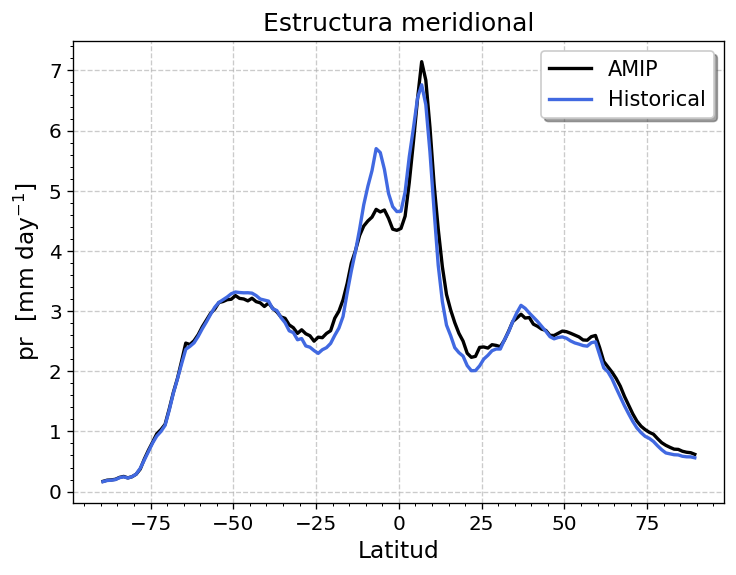

In [28]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(latsa, prm_amip,linewidth=2,c='k',label='AMIP')
plt.plot(latsh, prm_hist,linewidth=2,c='royalblue',label='Historical')
lineplot_setup(None,None,'Latitud','pr  [mm day$^{-1}$]',title='Estructura meridional',legend=True)

In [29]:
#Ejercicio 2.2
prsel_amip=prda_hist.sel(lat=slice(-10, 10)).mean(['lat','time'])
prsel_hist=prda_amip.sel(lat=slice(-10,10)).mean(['lat','time'])

In [30]:
lonsh=prsel_hist.lon
lonsa=prsel_amip.lon

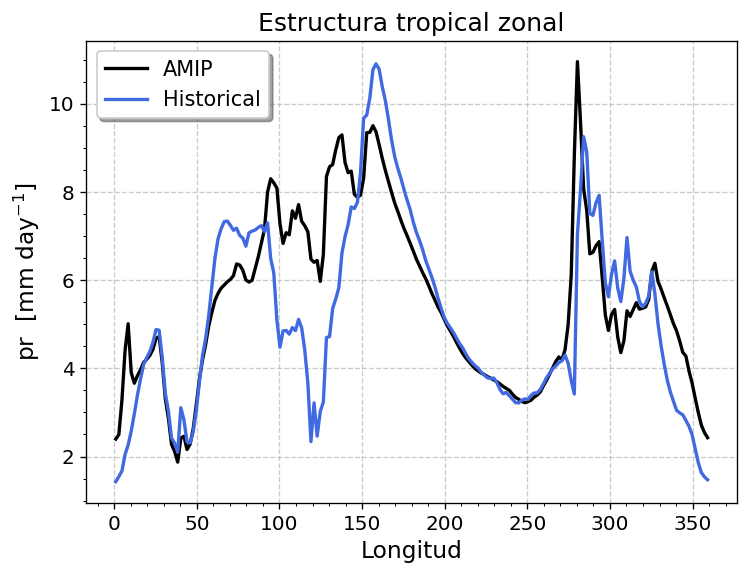

In [31]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(lonsa, prsel_amip,linewidth=2,c='k',label='AMIP')
plt.plot(lonsh, prsel_hist,linewidth=2,c='royalblue',label='Historical')
lineplot_setup(None,None,'Longitud','pr  [mm day$^{-1}$]',title='Estructura tropical zonal',legend=True)

In [32]:
#Ejercicio 2.3

En primera instancia, para la estructura meridional se observa una mayor precipitación en el ecuador que va bajando la concentración conforme avanza a los polos, exceptuando el aumento en latitudes -50° y 50°. Los modelos son consistentes, ya que a bajas latitudes hay una mayor radiación, dando pauta a más evaporación. Por el otro lado, los modelos histórico y AMIP cuentan con una mayor diferencia de precipitación para el históric. Este modelo toma en cuenta una variable más: el océano acoplado, por lo que hay una mayor retroalimentación océano-atmósfera. Asismismo, el feedback propicia una humedad constante por los océanos tropicales.

Seguidamente, la estructura tropical zonal data con precipitaciones menos estables, excluyendo a aquellas entre 170° a 270° aproximadamente. Este rango comprende regiones del océano pacífico, como la costa oeste de América del Norte y el Caribe. En estas zonas predominan las coordilleras y grandes áreas océanicas. Por ello, es congruente decir que los parámetros que modelan la precipitación es ENSO y los monzones tropicales, causando estaciones lluviosas. 

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 7 - Los escenarios (10 puntos) </font>**

Utilizando los datos de temperatura superficial del escenario SSP585 y los datos de la simulación histórica:

#### **<font color="RoyalBlue"> 1. Calcule la diferencia climatológica entre la simulación histórica (1979-2014) y el fin de siglo en la simulación de escenario (2070-2100).  </font>**

#### **<font color="RoyalBlue"> 2. Haga una figura con 3 mapas quasi-globales (puede incluir de 70$^\circ$S-70$^\circ$N), el primero para el promedio histórico, el segundo para el promedio del escenario y el último para la diferencia entre ellos. </font>**
    
#### **<font color="RoyalBlue"> 3. Grafique las series de tiempo de los datos históricos y los datos del escenario para promedios de temperatura en alguna región del centro de México. Haga sus gráficas en escala anual. </font>**
   
#### **<font color="RoyalBlue"> 4. Interprete sus resultados y comparelos con resultados similares obtenidos con el modelo FaIR en la práctica anterior. </font>**

---

---
<a name='ej-1'></a>
### **<font color="Navy"> Ejercicio 8 - Las distribuciones de probabilidad (15 puntos) </font>**

Una distribución de probabilidad es una función matemática que describe las posibles valores y la probabilidad de ocurrencia de cada uno de esos valores para una variable aleatoria.

Utilizando los datos de temperatura, precipitación y OLR de la simulación histórica. 

#### **<font color="RoyalBlue">1. Grafique el histograma o la distribución de probabilidad de cada variable utilizando todos los datos del periodo 1979-2014 utilizando todos los datos. Organice sus gráficas en varios paneles o figuras.  </font>**

#### **<font color="RoyalBlue"> 2. Recorte los datos de todas sus variables a una región de México. Con esos datos recortados, repita sus distribuciones del punto 1 pero haga dos gráficos por variable. Uno para el período 1920-1950 y otro para el período 1980-2014. En la gráfica de temperatura, agregue la distribución correspondiente para el período 2070-2100. </font>**
    
#### **<font color="RoyalBlue"> 3. Para las gráficas del punto 2, indique en sus distribuciones, la media de cada distribución como se muestra a continuación. </font>**
   
#### **<font color="RoyalBlue"> 4. Interprete sus resultados y explique qué cambios observa en la distribución de las variables en el tiempo, comparando principalmente los dos períodos considerados. Integre todos los demás conocimientos y argumentos expuestos en esta práctica. </font>**

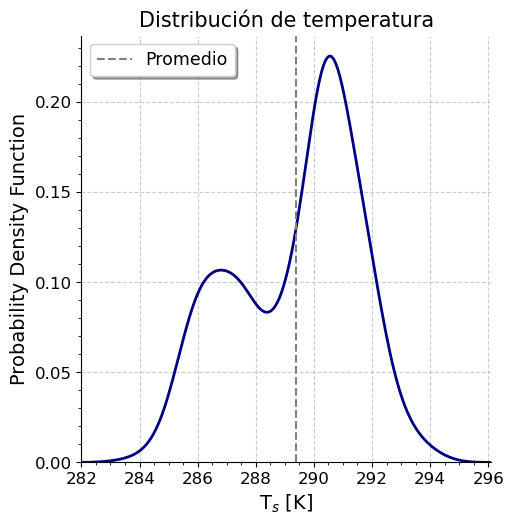

---

In [33]:
filename1='pr_Amon_HadGEM3-GC31-LL_historical_r2i1p1f3_gn_195001-201412.nc'
filename3='rlut_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'
filename4='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

ds1=xr.open_dataset(filename1)
ds3=xr.open_dataset(filename3)
ds4=xr.open_dataset(filename4)

pr =ds1['pr']*86400
tas = ds4['tas']
olr = ds3['rlut']

In [34]:
#Ejercicio 8.1
time_pr=pr[(pr.time.dt.year>=1979)&(pr.time.dt.year<=2014)]
time_tas=tas[(tas.time.dt.year>=1979)&(tas.time.dt.year<=2014)]
time_olr=olr[(olr.time.dt.year>=1979)&(olr.time.dt.year<=2014)]

In [35]:
prsel=time_pr.sel(lat=slice(0, 40))
tassel=time_tas.sel(lat=slice(0, 40))
olrsel=time_olr.sel(lat=slice(0, 40))

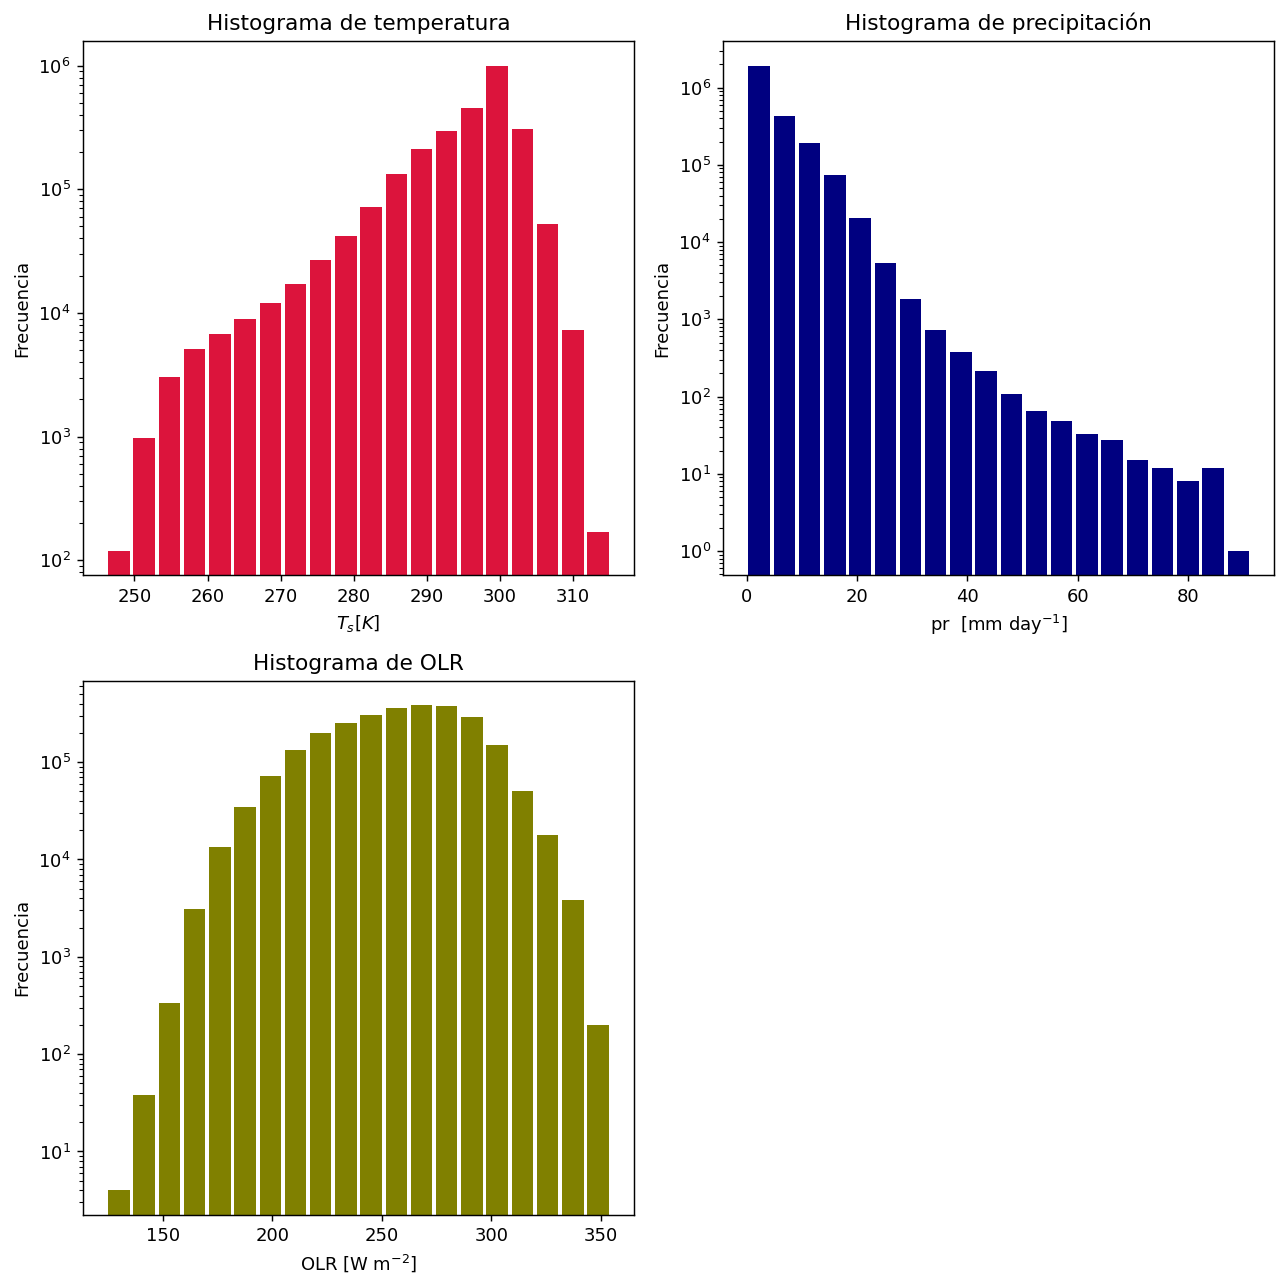

In [36]:
# Todos los datos en todas las dimensiones
data_tas = tassel.values.flatten()
data_pr = prsel.values.flatten()
data_olr = olrsel.values.flatten()

plt.figure(figsize=(10,10),dpi=130)
plt.subplot(2,2,1)
plt.hist(data_tas, bins=20, color ='crimson', rwidth=0.85)
plt.yscale('log')
plt.title('Histograma de temperatura')
plt.xlabel('$T_{s}[K]$')
plt.ylabel('Frecuencia')

plt.subplot(2,2,2)
plt.hist(data_pr, bins=20, color ='navy', rwidth=0.85)
plt.yscale('log')
plt.title('Histograma de precipitación')
plt.xlabel('pr  [mm day$^{-1}$]')
plt.ylabel('Frecuencia')

plt.subplot(2,2,3)
plt.hist(data_olr, bins=20, color ='olive', rwidth=0.85)
plt.yscale('log')
plt.title('Histograma de OLR')
plt.xlabel('OLR [W m$^{-2}$]')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [37]:
#Ejercicio 8.2 y 8.3
filename5='pr_Amon_HadGEM3-GC31-LL_historical_r2i1p1f3_gn_185001-194912.nc'
filename6='rlut_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_185001-194912.nc'
filename7='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_185001-194912.nc'
filename8='tas_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_201501-204912.nc'

ds5=xr.open_dataset(filename5)
ds6=xr.open_dataset(filename6)
ds7=xr.open_dataset(filename7)
ds8=xr.open_dataset(filename8) #el nuevo archivo

pr2 =ds5['pr']*86400
tas2 = ds7['tas']
olr2 = ds6['rlut']
tas3 = ds8['tas']

In [43]:
#Datos recortados al sur de México 
tas2_sur=tas2.sel(lat=slice(14,21), lon=slice(86, 100))
pr2_sur= pr2.sel(lat=slice(14,21), lon=slice(86, 100))
olr2_sur=olr2.sel(lat=slice(14,21), lon=slice(86, 100))

tas_sur=tas.sel(lat=slice(14,21), lon=slice(86, 100))
pr_sur= pr.sel(lat=slice(14,21), lon=slice(86, 100))
olr_sur=olr.sel(lat=slice(14,21), lon=slice(86, 100))

tas3_sur=tas3.sel(lat=slice(14,21), lon=slice(86, 100))

In [49]:
#Datos recortados a los años correspondientes
time1_pr=pr2_sur[(pr2_sur.time.dt.year>=1920)&(pr2_sur.time.dt.year<=1950)]
time1_tas=tas2_sur[(tas2_sur.time.dt.year>=1920)&(tas2_sur.time.dt.year<=1950)]
time1_olr=olr2_sur[(olr2_sur.time.dt.year>=1920)&(olr2_sur.time.dt.year<=1950)]

time2_pr=pr_sur[(pr_sur.time.dt.year>=1980)&(pr_sur.time.dt.year<=2014)]
time2_tas=tas_sur[(tas_sur.time.dt.year>=1980)&(tas_sur.time.dt.year<=2014)]
time2_olr=olr_sur[(olr_sur.time.dt.year>=1980)&(olr_sur.time.dt.year<=2014)]

time3_tas=tas3_sur[(tas3_sur.time.dt.year>=2015)&(tas3_sur.time.dt.year<=2050)] #profe, los archivos solo van del 2015 al 2050 :c

In [51]:
# Todos los datos en todas las dimensiones
data1_tas = time1_tas.values.flatten()
data1_pr = time1_pr.values.flatten()
data1_olr = time1_olr.values.flatten()

data2_tas = time2_tas.values.flatten()
data2_pr = time2_pr.values.flatten()
data2_olr = time2_olr.values.flatten()

data3_tas = time3_tas.values.flatten()

In [58]:
#Sacamos la media para cada histograma
prom1_tas = np.mean(data1_tas)
prom1_pr = np.mean(data1_pr)
prom1_olr = np.mean(data1_olr)

prom2_tas = np.mean(data2_tas)
prom2_pr = np.mean(data2_pr)
prom2_olr = np.mean(data2_olr)

prom3_tas = np.mean(data3_tas)

print('Promedio temp. 1920 al 1950:', prom1_tas)
print('Promedio temp. 1980 al 2014:', prom2_tas)
print('Promedio temp. 2015 al 2050:', prom3_tas)

print('Promedio pr. 1920 al 1950:', prom1_pr)
print('Promedio pr. 1980 al 2014:', prom2_pr)

print('Promedio OLR 1920 al 1950:', prom1_olr)
print('Promedio OLR 1980 al 2014:', prom2_olr)

Promedio temp. 1920 al 1950: 299.48672
Promedio temp. 1980 al 2014: 299.8383
Promedio temp. 2015 al 2050: 301.08737
Promedio pr. 1920 al 1950: 6.084049650568779
Promedio pr. 1980 al 2014: 5.926595805355962
Promedio OLR 1920 al 1950: 261.8921
Promedio OLR 1980 al 2014: 261.49106


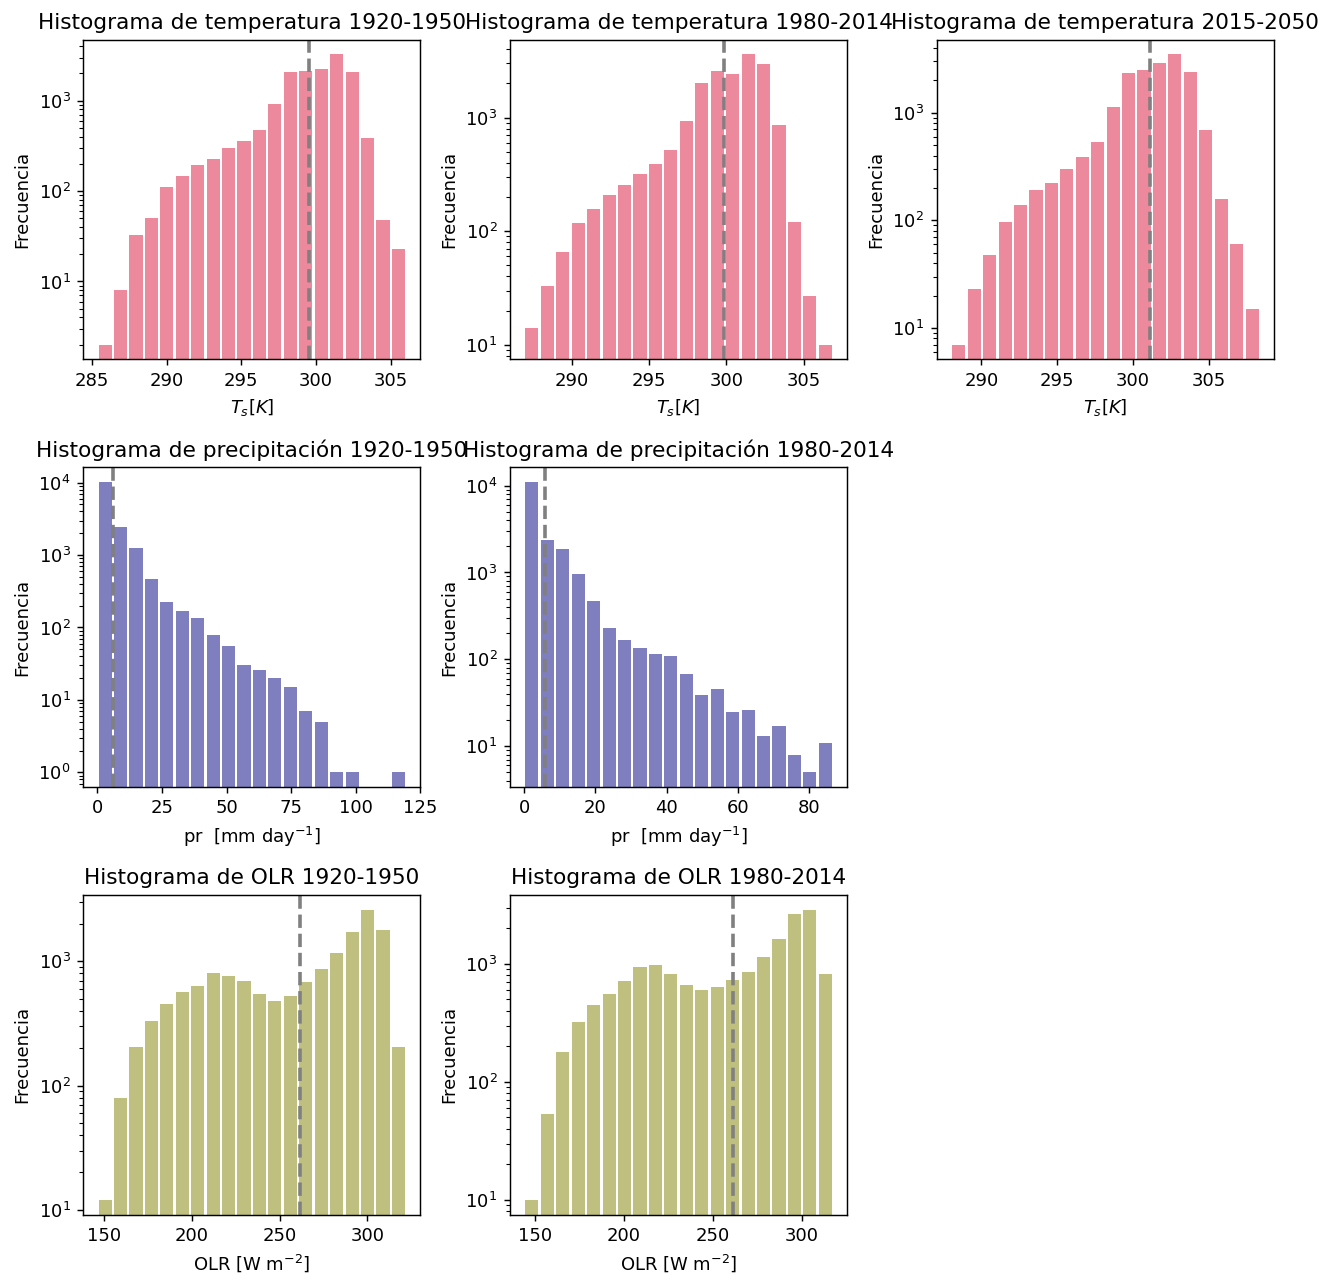

In [54]:
plt.figure(figsize=(10,10),dpi=130)
plt.subplot(3,3,1)
plt.hist(data1_tas, bins=20, color ='crimson', rwidth=0.85, alpha=0.5)
plt.axvline(prom1_tas, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de temperatura 1920-1950')
plt.xlabel('$T_{s}[K]$')
plt.ylabel('Frecuencia')

plt.subplot(3,3,2)
plt.hist(data2_tas, bins=20, color ='crimson', rwidth=0.85, alpha=0.5)
plt.axvline(prom2_tas, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de temperatura 1980-2014')
plt.xlabel('$T_{s}[K]$')
plt.ylabel('Frecuencia')

plt.subplot(3,3,3)
plt.hist(data3_tas, bins=20, color ='crimson', rwidth=0.85, alpha=0.5)
plt.axvline(prom3_tas, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de temperatura 2015-2050')
plt.xlabel('$T_{s}[K]$')
plt.ylabel('Frecuencia')

plt.subplot(3,3,4)
plt.hist(data1_pr, bins=20, color ='navy', rwidth=0.85, alpha=0.5)
plt.axvline(prom1_pr, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de precipitación 1920-1950')
plt.xlabel('pr  [mm day$^{-1}$]')
plt.ylabel('Frecuencia')

plt.subplot(3,3,5)
plt.hist(data2_pr, bins=20, color ='navy', rwidth=0.85, alpha=0.5)
plt.axvline(prom2_pr, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de precipitación 1980-2014')
plt.xlabel('pr  [mm day$^{-1}$]')
plt.ylabel('Frecuencia')

plt.subplot(3,3,7)
plt.hist(data1_olr, bins=20, color ='olive', rwidth=0.85, alpha=0.5)
plt.axvline(prom1_olr, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de OLR 1920-1950')
plt.xlabel('OLR [W m$^{-2}$]')
plt.ylabel('Frecuencia')

plt.subplot(3,3,8)
plt.hist(data2_olr, bins=20, color ='olive', rwidth=0.85, alpha=0.5)
plt.axvline(prom2_olr, color='grey', linestyle='dashed', linewidth=2)
plt.yscale('log')
plt.title('Histograma de OLR 1980-2014')
plt.xlabel('OLR [W m$^{-2}$]')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [55]:
#Ejercicio 8.4

Para el caso de las tres variables, conforme avanzan los años hay una variación significativa. Primeramente, la tendencia en el histograma de temperatura aumenta, dato que se corrobora de pasar de un promedio de 299.48 K a 301.08 K (aumento de 2°C). Asimismo, la mayor frecuencia de datos oscilan entre 297 K y 303 K para 1920-1950, mientras que de 2015-2050 aumentan los histogramas a frecuencias de hasta 308 K. 

Sin embargo, para la precipitación pasa un proceso inverso. El promedio inicial consta de 6.08 mm day-1, pero tiene una disminución final de 5.92 mm day-1. Al aumentar los niveles de temperatura es consistente pensar que la precipitación disminuye. Con base a los histogramas, si bien los promedios se encuentran en intervalos de 4 a 6 mm day-1, hay regiones donde se alcanzan hasta 123 mm day-1, pero en menor proporción.

Finalmente, la variable de OLR igualmente tiene una disminución, aunque en mucho menor proporción, ya que va de 261.89 a 261.49 Wm-2. Esto nos indica que hay un cambio en la distribución energética de la atmósfera, es decir, que hay mayor energía retenida en la atmósfera, como lo indica el aumento de temperatura. 

---
<a name='ej-1'></a>
### <font color="Navy"> Ejercicio 9 - The scientific challenge of understanding and estimating climate change (12 puntos) </font>**


#### **<font color="RoyalBlue">1. Explique según los autores y su investigación propia que es eso de que la investigación climática ya está "concluida" o "decidida". ¿A qué hace referencia esto y por qué, según los autores Palmer y Stevens, no es cierto?  </font>**

#### **<font color="RoyalBlue"> 2. ¿Por qué es importante que los modelos climáticos globales sean confiables? </font>**
    
#### **<font color="RoyalBlue"> 3. Según los autores, qué han logrado hacer bien los modelos climáticos globales y en qué siguen rezagados. </font>**
   
#### **<font color="RoyalBlue"> 4. Explique las figuras 2 y 3 y las significancia de los resultados en el argumento general de los autores en el artículo. </font>**

#### **<font color="RoyalBlue"> 5. ¿Cuál es la nueva estrategia propuesta por los autores para la modelación climática global? </font>**

Es importante enfatizar que es necesario responder (1) habiendo leído y comprendido el texto y (2) utilizando sus palabras y agregando comentarios producto de su comprensión y línea de pensamiento. Las respuestas escuetas, simples traducciones o respuestas sin muestras de su comprensión o investigación propia serán muy poco valoradas.

---

---
<a name='ej-1'></a>
### **<font color="Navy"> Extra 1: Anomalías de ENSO  (15 puntos) </font>**

 Utilizando su índice calculado en el ejercicio 3:

#### **<font color="RoyalBlue"> 1. Determine todos los instantes en su simulación donde el índice supere el valor de +1 desviación estándar o sea menor a -1 desviación estándar. Los primeros serán su fase positiva de ENSO y los segundos su fase negativa. </font>**

#### **<font color="RoyalBlue"> 2. Seleccione los datos correspondientes a las fechas asignadas para cada fase.  </font>**

#### **<font color="RoyalBlue"> 3. Obtenga la anomalía de sus datos de temperatura superficial, definida como la diferencia de cada punto en cada tiempo con respecto al correspondiente ciclo anual, así como le hizo para sus datos en el ejercicio 3.  </font>**

#### **<font color="RoyalBlue"> 4. Haga los mapas correspondientes a las anomalías de las fases positivas y negativas de su arreglo para la temperatura. </font>**

#### **<font color="RoyalBlue"> 5. Repita los puntos 2-4 para la variable de precipitación. </font>**

#### **<font color="RoyalBlue"> 6. Compare sus datos cualitativamente con anomalías de ENSO de otras fuentes como por ejemplo, https://journals.ametsoc.org/view/journals/clim/29/24/jcli-d-14-00672.1.xml. Explique sus resultados, diferencias con otras fuentes y aventure a explicar qué podría causar estas diferencias y cómo podría mejorar este análisis. </font>**

---
 
 


